# Import Data  
This coding practice was designed for 3 hour completion in class.  Learners will fill the incomplete codes (None) to make them complete.  Given a project structure as follows  
- Project  
  - src  
  - data  
  - plot  

Your `.ipynb` file was saved in the `src` folder and your data was saved in the `data` folder.  We learned how to import data until data preparation from the previous lab.  Let's reuse it again starting from import data.

In [1]:
import pandas as pd

df = pd.read_excel("../data/ENB2012_data.xlsx", sheet_name="data")

**Optional**: The unsupervised learning does not require label.  This label preparation is just help in visualizaiton.  The original data does not have a categorical label whether a building is an energy-saving or not.  We created a utility function to derive such label from heating load (hl) and cooling load (cl).

In [2]:
import numpy as np

def getlabel(hl, cl, alpha=1):
    if np.abs(hl - cl) - alpha >= 0:
        return 1
    else:
        return 0

In [3]:
df["is_energy_saving"] = df.apply(lambda x: getlabel(x["Y1"], x["Y2"]), axis=1)

Some categorical data was encoded such as `X6`.  However, it is inappropriate to use such encoding values directly to the clustering algorithm due to the basic of statistical data type (Nomonal, Ordinal, Interval and Ratio).  We have 2 options to handle it.  

- Option 1: Use dummy variables  
- Option 2: Exclude from features during clustering then use them later after getting clustering output for interpretation purpose.  

Let's make it to be a meaningful featul feature and create a set of dummy variables so that we can do any option above.

In [4]:
df["orientation"] = df["X6"].map({2: "north", 3: "east", 4: "south", 5: "west"})
orientation = pd.get_dummies(df["orientation"])
df = pd.concat([df, orientation], axis=1)

In [5]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,is_energy_saving,orientation,east,north,south,west
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,1,north,0,1,0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,1,east,1,0,0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,1,south,0,0,1,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,1,west,0,0,0,1
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,1,north,0,1,0,0


This tutorials demonstrate the option 2, howver the option 1 can use knowledge obtained from this tutorials.  

# Data Preparation  

Select features for clustering.  Here we follow the `option 2`.  The `X6` will be ommitted where `X8` is unusable according to our `Lab 3` and `Lab 4`.

In [6]:
X = df.loc[:, ["X1", "X2", "X3", "X4", "X5", "X7"]].values

The basic settings for clustering, mostly, use `Euclidean Distance`.  However, its limitation is the scaling.  Different feature scale could bias to the clustering algorithm.  To prevent such a problem, we apply one of scaling techniques called `MinMax Scaling`.

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X)

X_scaled = scaler.transform(X)

`X` is the original data while `X_scaled` will be used for running clustering algorithms.

# Modeling  

This tutorials demonstrate `K-means`, `Hierarchical Agglomorative Clustering (HAC)`, and `DBscan`.  All of them returns the same things called `cluster membership` which is the cluster label assigned to each samples.  

## K-Means Clustering  

The goal is to determine cluster membership for each sample from the best `k` groups.  The optimal `k` can be derived from the `Elbow method` by varying `k` and pick the minimum `silhouette score`.  

**Activity 1**: Initialize the `K-means clustering` and vary `k` from 2 to 8.

In [8]:
from sklearn.cluster import KMeans

seed = 433

kmeans = {}

for k in range(2, 8):
    kmeans[k] = KMeans(n_clusters=k, random_state=seed).fit(X_scaled)

**Activity 2**: Discover the change of `silhouette score`.

Text(0, 0.5, 'Silhouette Score')

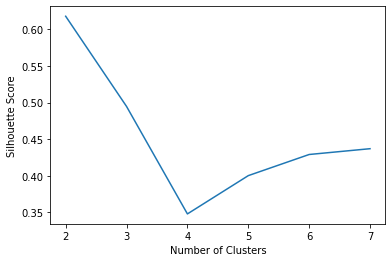

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

n_clusters = list(range(2, 8))

scores = {}
scores["kmeans"] = [silhouette_score(X_scaled, kmeans[k].labels_, metric="euclidean") for k in n_clusters]

plt.plot(n_clusters, scores["kmeans"])
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")

The optimum number of `k` groups is 4.  Therefore, we will pick the cluster membership from `k=4`.  Note that the optimum `k` could be overwritten by business constraints.  The cluster memberships when `k=4` are the following

In [10]:
kmeans[4].labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3,
       3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Let's add this output to the original data

In [11]:
df["kmeans"] = kmeans[4].labels_

In [12]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,is_energy_saving,orientation,east,north,south,west,kmeans
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,1,north,0,1,0,0,1
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,1,east,1,0,0,0,1
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,1,south,0,0,1,0,1
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,1,west,0,0,0,1,1
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,1,north,0,1,0,0,1


## Hierarchical Clusering  
The goal is determine cluster membership for each sample from the cutoff.  However, the cutoff is arbitrally chosen or finding the optimal cutoff from the `elbow method`.  

**Activity 3**: Initialize the `Hierarchical Clustering` using the `single-linked` method.

In [13]:
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import fcluster

hac = hierarchy.linkage(X_scaled, method="single", metric="euclidean")

The output of `HAC` can be represented by a dendrogram.

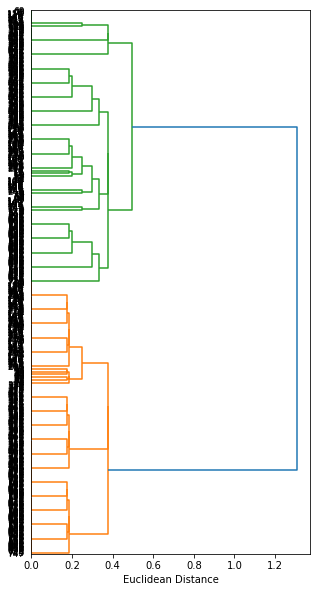

In [14]:
fig = plt.figure(figsize=(5, 10))
dendrogram = hierarchy.dendrogram(hac, orientation="right",leaf_font_size=9, leaf_rotation=360)
plt.xlabel('Euclidean Distance');

One of dendrogram limitations is reading difficulty when the number of samples is getting large.  The above figure compressed samples and make the values on axis unreadable.  

**Activity 4**: Expand the plot on the vertical axis.  Discuss about the next problem of dendrogram.

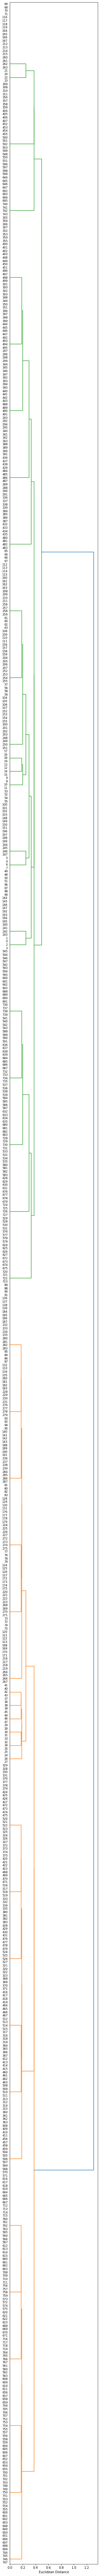

In [15]:
fig = plt.figure(figsize=(5, 150))
dendrogram = hierarchy.dendrogram(hac, orientation="right",leaf_font_size=9, leaf_rotation=360)
plt.xlabel('Euclidean Distance');

Even though the values are readable, it induces another problem about observing cluster membership difficulty.  Therefore, the dendrogram is good when the number of samples is small.  

We will arbitrally define the cutoff to obtain cluster membership/

In [16]:
cutoff = 0.2
membership = fcluster(hac, t=cutoff, criterion="distance")
print("We have {} data points".format(X.shape[0]))
print ("Setting threshold at {} returns {} clusters".format(cutoff, len(np.unique(membership))))

We have 768 data points
Setting threshold at 0.2 returns 20 clusters


The cutoff indicates the minimum distance to be merged according to the `single-link method`.  The smaller the more number of clusters you will get.  We can also use the `elbow approach` to determine the optimal cutoff, however it is harder than the `k-means` because the cutoff is not integer.  The more precise cutoff the more computational resource you need.  

To simplify computation, we will just vary the cutoff from 0.2 to 0.5 where each steps increases the cutoff by 0.05.  

**Activity 5**: Create a range of cutoff values from 0.2 to 0.5 where each steps increases the cutoff by 0.05.

In [17]:
import numpy as np

lower = 0.2
upper = 0.5
steps = 0.05
nticks = round(((upper - lower) / steps)) + 1
cutoffs = np.linspace(lower, upper, num=nticks, endpoint=True)
print("List of cutoffs is: {}".format(cutoffs))

List of cutoffs is: [0.2  0.25 0.3  0.35 0.4  0.45 0.5 ]


Then we run the `HAC` with the above cutoff values.

In [18]:
HAC = {}

for c in cutoffs:
    HAC[c] = fcluster(hac, t=c, criterion="distance")

scores["hac"] = [silhouette_score(X_scaled, HAC[c], metric="euclidean") for c in cutoffs]

Text(0, 0.5, 'Silhouette Score')

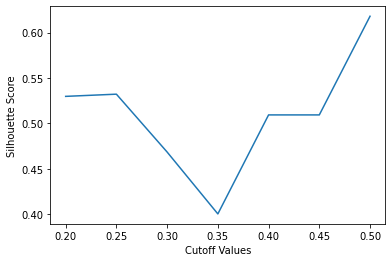

In [19]:
plt.plot(cutoffs, scores["hac"])
plt.xlabel("Cutoff Values")
plt.ylabel("Silhouette Score")

The optimal cutoff is 0.35. Therefore, we update the cluster membership to the original data.  

**Important**: Note that the cluster label from differnce cluster algorithm does not infer the same meaning even the label is the same.

In [20]:
df["hac"] = HAC[0.35]
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,is_energy_saving,orientation,east,north,south,west,kmeans,hac
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,1,north,0,1,0,0,1,5
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,1,east,1,0,0,0,1,5
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,1,south,0,0,1,0,1,5
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,1,west,0,0,0,1,1,5
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,1,north,0,1,0,0,1,5


## DBscan  

The goal is to determine cluster memberships from predefined epsilon and minimum samples inside the scanning boundaries.  

**Activity 6**: Initialize a `DBscan` where the `epsilon` is set to 0.4 and minimum samples is set to 5 samples.

In [21]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps=0.4, min_samples=5)
dbs.fit(X_scaled)

DBSCAN(eps=0.4)

Explore the cluster membership.

In [22]:
dbs.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

If any cluster membership equals to `-1`, it means such a data point cannot join with any cluster for `DBscan algorithm`.  Finding the optimum hyperparameters can follows the same idea of the elbow method.  However, `DBscan` has 2 hyperparameters, the combination of them could be much more than previous algorithms.  To simplify our study, let's create a simple hyperplane.  
**Activity 7**: Create a hyperplane as follows  
- Epsilon varied from 0.1 to 0.4 where each step is increased by 0.1.  
- Minimum samples varied from 3 to 8 where each step is increased by 1.  

Plot the hyperplane.

In [23]:
lower_eps = 0.1
upper_eps = 0.4
steps_eps = 0.1
nticks_eps = round(((upper_eps - lower_eps) / steps_eps)) + 1
epsilons = np.linspace(lower_eps, upper_eps, num=nticks_eps, endpoint=True)
print("List of epsilons is: {}".format(epsilons))

lower_nsamples = 3
upper_nsamples = 8
steps_nsamples = 1
nticks_nsamples = round(((upper_nsamples - lower_nsamples) / steps_nsamples)) + 1
nsamples = np.linspace(lower_nsamples, upper_nsamples, num=nticks_nsamples, endpoint=True)
print("List of minimum samples is: {}".format(nsamples))

List of epsilons is: [0.1 0.2 0.3 0.4]
List of minimum samples is: [3. 4. 5. 6. 7. 8.]


Let's determine the cluster membership from optimum hyperparameters.

In [24]:
from itertools import product
hparams = list(product(*(epsilons, nsamples)))

DBS = {}
for hparam in hparams:
    DBS[hparam] = DBSCAN(eps=hparam[0], min_samples=int(hparam[1])).fit(X_scaled)

scores["dbs"] = [silhouette_score(X_scaled, DBS[hparam].labels_, metric="euclidean") for hparam in hparams]

Visualize the change of silhouette score.

Text(0, 0.5, 'Silhouette Score')

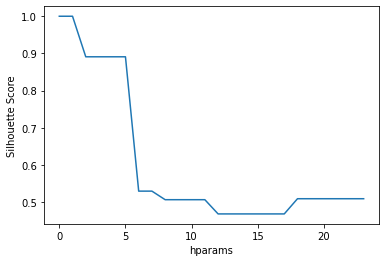

In [25]:
plt.plot(range(len(hparams)), scores["dbs"])
plt.xlabel("hparams")
plt.ylabel("Silhouette Score")

We can observe that hyperparameter set 12 to 17 return minimum silhouette score.  We could pick any of them.  Let's pick the set 12.  Our optimum hyperparameters are the following.

In [26]:
hparams[12]

(0.30000000000000004, 3.0)

We add this result from the set 12 of hyperparameters to the original data.

In [27]:
df["dbscan"] = DBS[hparams[12]].labels_

In [28]:
df.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,is_energy_saving,orientation,east,north,south,west,kmeans,hac,dbscan
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,1,north,0,1,0,0,1,5,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,1,east,1,0,0,0,1,5,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,1,south,0,0,1,0,1,5,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,1,west,0,0,0,1,1,5,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,1,north,0,1,0,0,1,5,1
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46,25.38,1,east,1,0,0,0,1,5,1
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71,25.16,1,south,0,0,1,0,1,5,1
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68,29.60,1,west,0,0,0,1,1,5,1
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.50,27.30,1,north,0,1,0,0,1,5,1
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.95,21.97,1,east,1,0,0,0,1,5,1


# Interpretation  

The aim of clustering is to reveal hidden structure in data that leads to some meaningful interpretation.  We shall compare the statistical parameters for each feature of each group incoporate with the categorical data that was excluded in feature selection.  `Seaborn` is an easy plot tool for this case that can be installed via command `pip install seaborn`.  We will demonstrate one cluster from the `K-means`. 

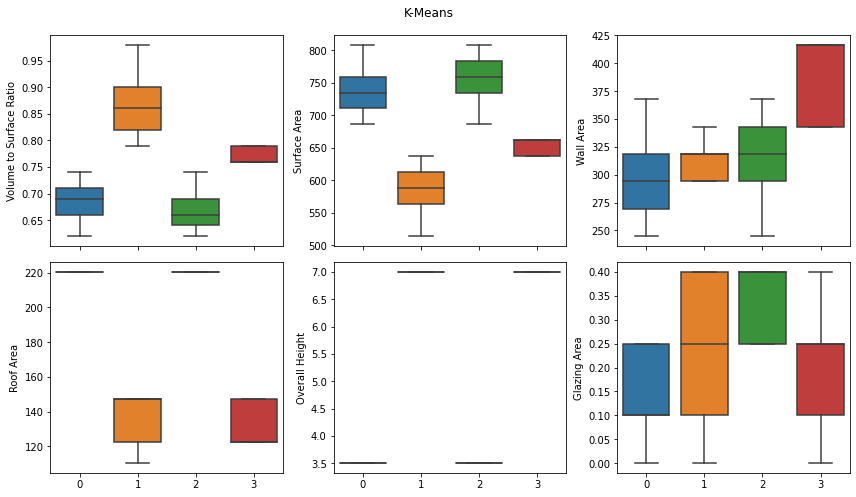

In [43]:
import seaborn as sns

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12, 7), sharex=True)

sns.boxplot(x="kmeans", y="X1", data=df, ax=ax[0, 0])
ax[0, 0].set_xlabel("")
ax[0, 0].set_ylabel("Volume to Surface Ratio")

sns.boxplot(x="kmeans", y="X2", data=df, ax=ax[0, 1])
ax[0, 1].set_xlabel("")
ax[0, 1].set_ylabel("Surface Area")

sns.boxplot(x="kmeans", y="X3", data=df, ax=ax[0, 2])
ax[0, 2].set_xlabel("")
ax[0, 2].set_ylabel("Wall Area")

sns.boxplot(x="kmeans", y="X4", data=df, ax=ax[1, 0])
ax[1, 0].set_xlabel("")
ax[1, 0].set_ylabel("Roof Area")

sns.boxplot(x="kmeans", y="X5", data=df, ax=ax[1, 1])
ax[1, 1].set_xlabel("")
ax[1, 1].set_ylabel("Overall Height")

sns.boxplot(x="kmeans", y="X7", data=df, ax=ax[1, 2])
ax[1, 2].set_xlabel("")
ax[1, 2].set_ylabel("Glazing Area")

plt.suptitle("K-Means")
fig.tight_layout()

We can interpret the characteristics of each cluster as follows.  
**Cluster 0**: This cluster is one of the hardest for heat transferring compated to other clusters indicated by `X1`.  It has very large surface areas and highest variation of the wall area.  The roof area is very large but less variation.  Its overall height and overall glazing area are one of the lowest values.  Such characteristics probably reflect a one-floor modern style.  
![Cluster0](https://www.banidea.com/wp-content/uploads/2020/04/roehnerryan-weave-modern-house-15-620x465.jpg)

Save your data for further use in `Orange`.

In [ ]:
df.to_csv("../data/lab5-data.csv", index-False)

# Congratulation  
You have completed the lab 5.  Good jobs.